In [1]:
from nltk.corpus import reuters
import nltk
#nltk.download('reuters')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Getting train and test dataset from nltk reuters corpus

In [2]:
train_documents, train_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('training/')])
test_documents, test_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('test/')])

In [29]:
for i in reuters.fileids():
    if i.startswith('training/'):
        print (i)

training/1
training/10
training/100
training/1000
training/10000
training/10002
training/10005
training/10008
training/10011
training/10014
training/10015
training/10018
training/10023
training/10025
training/10027
training/1003
training/10032
training/10035
training/10037
training/10038
training/10040
training/10041
training/10042
training/10043
training/10046
training/10048
training/10049
training/10050
training/10052
training/10053
training/10054
training/10057
training/10058
training/10061
training/10062
training/10064
training/10065
training/10066
training/10067
training/10068
training/1007
training/10071
training/10073
training/10074
training/10075
training/10076
training/10078
training/10079
training/1008
training/10080
training/10081
training/10083
training/10085
training/10086
training/10088
training/10089
training/1009
training/10090
training/10091
training/10092
training/10094
training/10095
training/10096
training/10097
training/10098
training/10099
training/101
training/10

training/12852
training/12853
training/12857
training/12858
training/12860
training/12861
training/12862
training/12866
training/12869
training/1287
training/12872
training/12874
training/12875
training/12877
training/12878
training/1288
training/12880
training/12882
training/12883
training/12885
training/12886
training/12887
training/12888
training/12889
training/12890
training/12891
training/12893
training/12897
training/12898
training/129
training/12900
training/12901
training/12904
training/12905
training/12907
training/12908
training/1291
training/12910
training/12912
training/12914
training/12915
training/12917
training/12919
training/1292
training/12923
training/12924
training/12929
training/1293
training/12933
training/12935
training/12937
training/12940
training/12943
training/12948
training/12949
training/1295
training/12956
training/12959
training/12962
training/12963
training/12965
training/12969
training/12971
training/12973
training/12974
training/12978
training/1298
trai

training/3807
training/3808
training/381
training/3817
training/3821
training/3825
training/3828
training/383
training/3830
training/3831
training/3833
training/3838
training/3839
training/3840
training/3841
training/3843
training/3846
training/3847
training/3850
training/3851
training/3853
training/3855
training/3856
training/3857
training/3858
training/3860
training/3862
training/3864
training/3865
training/3867
training/3868
training/3869
training/387
training/3870
training/3872
training/3873
training/3874
training/3875
training/3879
training/388
training/3881
training/3884
training/3886
training/3888
training/389
training/3890
training/3892
training/3893
training/3894
training/3895
training/3897
training/3898
training/3899
training/390
training/3900
training/3901
training/3902
training/3903
training/3904
training/3905
training/3906
training/3908
training/3909
training/3910
training/3912
training/3913
training/3916
training/3917
training/3918
training/392
training/3920
training/3922

training/7686
training/7687
training/7690
training/7693
training/7694
training/7696
training/7698
training/77
training/7700
training/7702
training/7704
training/7707
training/7709
training/7710
training/7715
training/7716
training/7722
training/7723
training/7725
training/7726
training/7728
training/7729
training/773
training/7730
training/7732
training/7733
training/7734
training/7735
training/7736
training/7737
training/7738
training/7739
training/774
training/7742
training/7743
training/7744
training/7746
training/7747
training/7749
training/7752
training/7755
training/7757
training/776
training/7761
training/7762
training/7763
training/7764
training/7765
training/7766
training/7767
training/7768
training/7769
training/7771
training/7773
training/7774
training/7775
training/7776
training/778
training/7782
training/7784
training/7785
training/7789
training/7790
training/7791
training/7792
training/7795
training/7796
training/7797
training/78
training/780
training/7802
training/7804
t

In [30]:
reuters.raw('training/10')

"COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES SALE\n  Computer Terminal Systems Inc said\n  it has completed the sale of 200,000 shares of its common\n  stock, and warrants to acquire an additional one mln shares, to\n  &lt;Sedio N.V.> of Lugano, Switzerland for 50,000 dlrs.\n      The company said the warrants are exercisable for five\n  years at a purchase price of .125 dlrs per share.\n      Computer Terminal said Sedio also has the right to buy\n  additional shares and increase its total holdings up to 40 pct\n  of the Computer Terminal's outstanding common stock under\n  certain circumstances involving change of control at the\n  company.\n      The company said if the conditions occur the warrants would\n  be exercisable at a price equal to 75 pct of its common stock's\n  market price at the time, not to exceed 1.50 dlrs per share.\n      Computer Terminal also said it sold the technolgy rights to\n  its Dot Matrix impact technology, including any future\n  improvements, to &lt;

In [3]:
print("Number of training documents:", len(train_documents))
print("Number of testing documents:", len(test_documents))

Number of training documents: 7769
Number of testing documents: 3019


In [4]:
## distribution of document number per category

In [5]:
## distribution of word counts per document

## Convert the categorical labels to Multi Label Encodings

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(train_categories)
test_labels = mlb.transform(test_categories)

In [7]:
train_labels = pd.DataFrame(train_labels)
train_labels.columns = mlb.classes_

test_labels = pd.DataFrame(test_labels)
test_labels.columns = mlb.classes_

whole_data = pd.concat([train_labels, test_labels], axis = 0).reset_index(drop = True)
whole_data

,acq,alum,barley,bop,carcass,castor-oil,cocoa,coconut,coconut-oil,coffee,...,sun-oil,sunseed,tea,tin,trade,veg-oil,wheat,wpi,yen,zinc
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### distribution of category number per document

In [8]:
cat_num_doc = whole_data.sum(1)
cat_num_doc = pd.DataFrame(cat_num_doc)
cat_num_doc.columns = ['cat_num_doc']

In [9]:
cat_num_doc.mean()

cat_num_doc    1.235447
dtype: float64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

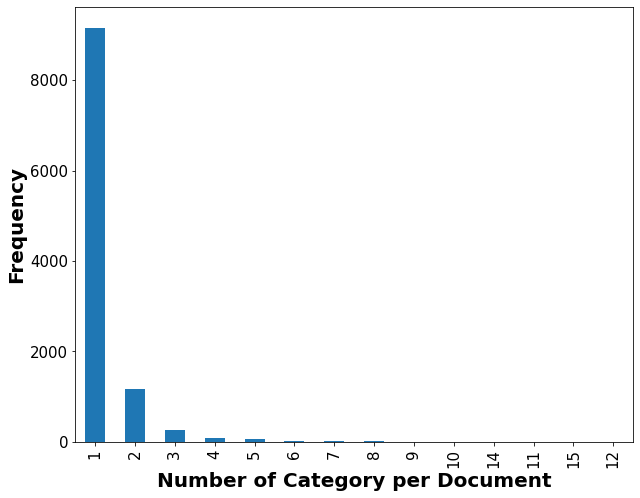

In [10]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) 
cat_num_doc["cat_num_doc"].value_counts().plot(ax=axs, kind='bar')

plt.xlabel('Number of Category per Document',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### distribution of doc number per category

In [11]:
doc_num_cat = whole_data.sum(0)
doc_num_cat = pd.DataFrame(doc_num_cat)
doc_num_cat.columns = ['doc_num_cat']
doc_num_cat = doc_num_cat.sort_values(by = ['doc_num_cat'], ascending = False)
doc_num_cat = doc_num_cat.reset_index()


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

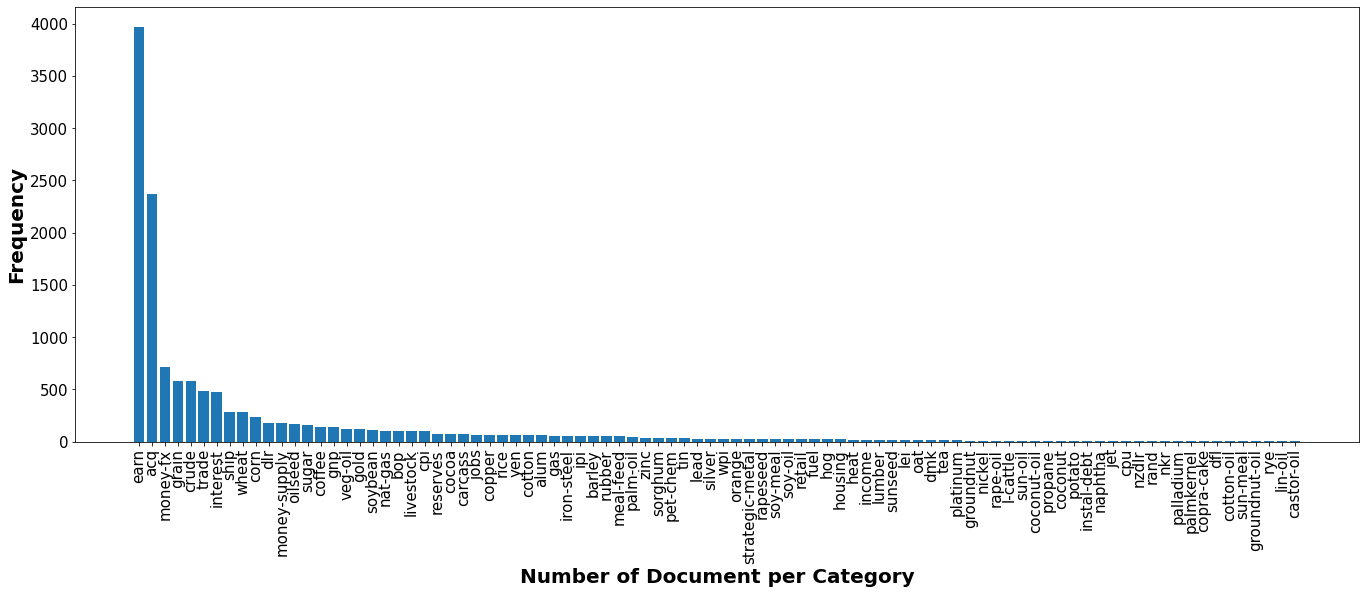

In [12]:
fig, axs = plt.subplots(1,1,figsize=(23,8)) 

plt.bar(doc_num_cat['index'], doc_num_cat['doc_num_cat'])

plt.xlabel('Number of Document per Category',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)

## Creating Dataframe for applying transformations

In [13]:
trainData = {"content": train_documents}
testData = {"content": test_documents}
trainDf = pd.DataFrame(trainData, columns=["content"])
testDf = pd.DataFrame(testData, columns=["content"])

In [14]:
whole_data = pd.concat([trainDf, testDf], axis = 0).reset_index(drop = True)

In [15]:
wordcount_file = [len(i.strip()) for i in whole_data['content']]
np.mean(wordcount_file)

814.9999073044123

In [16]:
tmp = []
for i in wordcount_file:
    if i <=500:
        tmp.append(i)
len(tmp) 

5106

In [17]:
np.std(wordcount_file)

883.1324548422452

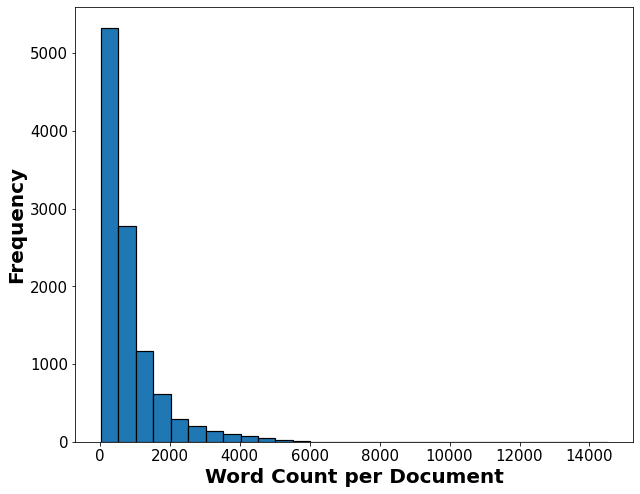

In [18]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) 

binwidth = 500
plt.hist(wordcount_file, bins=range(min(wordcount_file), max(wordcount_file) + binwidth, binwidth), edgecolor='black', linewidth=1.2)

plt.xlabel('Word Count per Document',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()

## Pre-process the input data

In [19]:
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(w.rstrip() for w in open("../../nltk_data/corpora/reuters/stopwords"))

def tokenize_lemma_stopwords(text):
    text = text.replace("\n", " ")
    tokens = nltk.tokenize.word_tokenize(text.lower()) # split string into words (tokens)
    tokens = [t for t in tokens if t.isalpha()] # keep strings with only alphabets
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["content"] = data["content"].apply(tokenize_lemma_stopwords)
    return data

In [20]:
cleanedTrainData = dataCleaning(trainDf)
cleanedTestData = dataCleaning(testDf)

In [24]:
trainDf['content'][1]

"COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES SALE\n  Computer Terminal Systems Inc said\n  it has completed the sale of 200,000 shares of its common\n  stock, and warrants to acquire an additional one mln shares, to\n  &lt;Sedio N.V.> of Lugano, Switzerland for 50,000 dlrs.\n      The company said the warrants are exercisable for five\n  years at a purchase price of .125 dlrs per share.\n      Computer Terminal said Sedio also has the right to buy\n  additional shares and increase its total holdings up to 40 pct\n  of the Computer Terminal's outstanding common stock under\n  certain circumstances involving change of control at the\n  company.\n      The company said if the conditions occur the warrants would\n  be exercisable at a price equal to 75 pct of its common stock's\n  market price at the time, not to exceed 1.50 dlrs per share.\n      Computer Terminal also said it sold the technolgy rights to\n  its Dot Matrix impact technology, including any future\n  improvements, to &lt;

In [25]:
cleanedTrainData['content'][1]

'comput termin system cpml complet sale comput termin system complet sale share common stock warrant acquir addit mln share sedio lugano switzerland dlr compani warrant exercis year purchas price dlr share comput termin sedio buy addit share increas total hold pct comput termin outstand common stock circumst involv chang control compani compani condit occur warrant exercis price equal pct common stock market price time exceed dlr share comput termin sold technolgi dot matrix impact technolog includ ani futur improv woodco houston tex dlr continu exclus worldwid license technolog woodco compani move part reorgan plan pay current oper cost ensur product deliveri comput termin make comput gener label form tag ticket printer termin'

# Create TF-IDF Vectorizer (Bag of Words)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(cleanedTrainData["content"])
vectorised_test_documents = vectorizer.transform(cleanedTestData["content"])

In [40]:
vectorised_train_documents.shape

(7769, 16898)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(vectorised_train_documents, train_labels)

svmPreds = svmClassifier.predict(vectorised_test_documents)
metricsReport("SVC Sq. Hinge Loss", test_labels, svmPreds)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

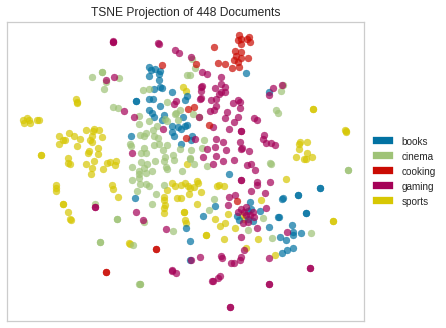

<AxesSubplot:title={'center':'TSNE Projection of 448 Documents'}>

In [29]:
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus.data)
y = corpus.target

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

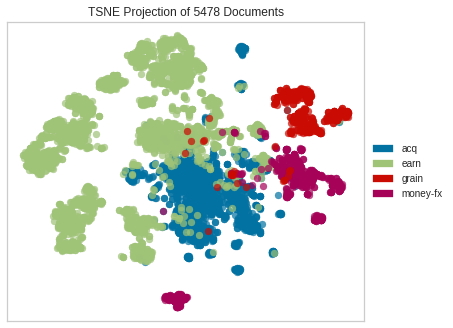

<AxesSubplot:title={'center':'TSNE Projection of 5478 Documents'}>

In [30]:
from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()

y = []
index = []
for i in range(len(train_labels)):
    if train_labels['earn'][i] == 1:
        index.append(i)
        y.append('earn')
    elif train_labels['acq'][i] == 1:
        index.append(i)
        y.append('acq')
    elif train_labels['money-fx'][i] == 1:
        index.append(i)
        y.append('money-fx')
    elif train_labels['grain'][i] == 1:
        index.append(i)
        y.append('grain')
        
tsne.fit(vectorised_train_documents[index,:], y)
tsne.show()

In [31]:
import time
from sklearn.manifold import TSNE

df_subset = pd.DataFrame(vectorised_train_documents[index,:])
data_subset = vectorised_train_documents[index,:]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.001s...
[t-SNE] Computed neighbors for 5478 samples in 1.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478
[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 0.340007
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.122711
[t-SNE] KL divergence after 300 iterations: 3.397719
t-SNE done! Time elapsed: 11.69812273979187 seconds


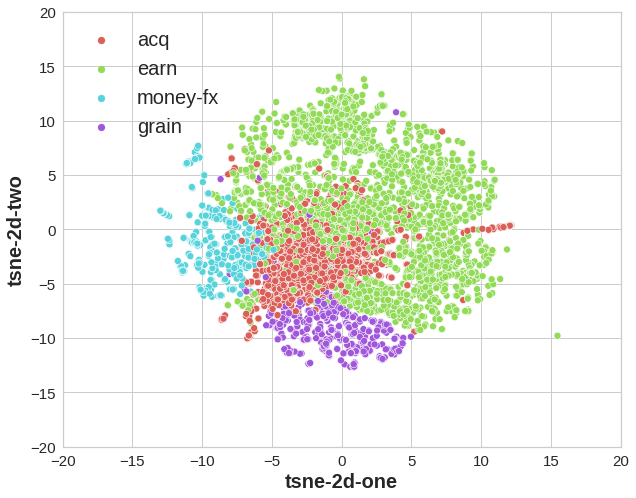

In [32]:
import seaborn as sns
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y
plt.figure(figsize=(10,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.xlabel('tsne-2d-one',fontsize=20, weight = 'bold')
plt.ylabel('tsne-2d-two',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 20)

## embedding pretrained word2vec

In [37]:
train_word2vec = pd.read_csv('embedding_pretrain_word2vec_train_retrain.csv')
train_word2vec = train_word2vec.iloc[:, 1:].values

In [38]:
import time
from sklearn.manifold import TSNE

df_subset = pd.DataFrame(train_word2vec[index,:])
data_subset = train_word2vec[index,:]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.136s...
[t-SNE] Computed neighbors for 5478 samples in 14.241s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478
[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 1148.261403
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.120743
[t-SNE] KL divergence after 300 iterations: 2.440581
t-SNE done! Time elapsed: 22.31369972229004 seconds


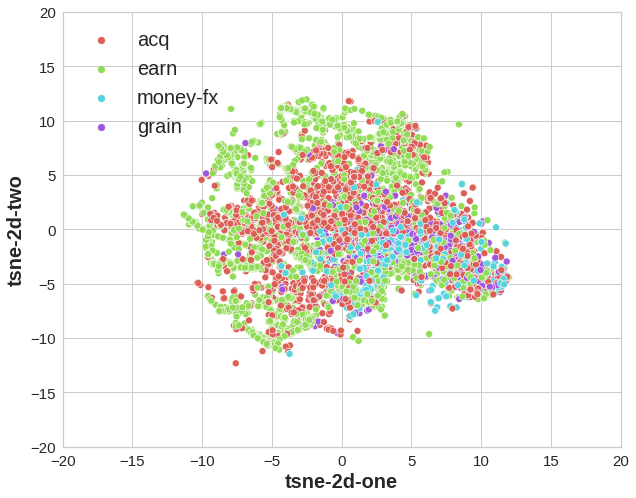

In [39]:
import seaborn as sns
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y
plt.figure(figsize=(10,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.xlabel('tsne-2d-one',fontsize=20, weight = 'bold')
plt.ylabel('tsne-2d-two',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 20)

## embedding retrained word2vec

In [33]:
train_word2vec = pd.read_csv('embedding_word2vec_train_retrain.csv')
train_word2vec = train_word2vec.iloc[:, 1:].values

In [34]:
import time
from sklearn.manifold import TSNE

df_subset = pd.DataFrame(train_word2vec[index,:])
data_subset = train_word2vec[index,:]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.415s...
[t-SNE] Computed neighbors for 5478 samples in 58.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478
[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 0.458252
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.651321
[t-SNE] KL divergence after 300 iterations: 2.089117
t-SNE done! Time elapsed: 74.60465216636658 seconds


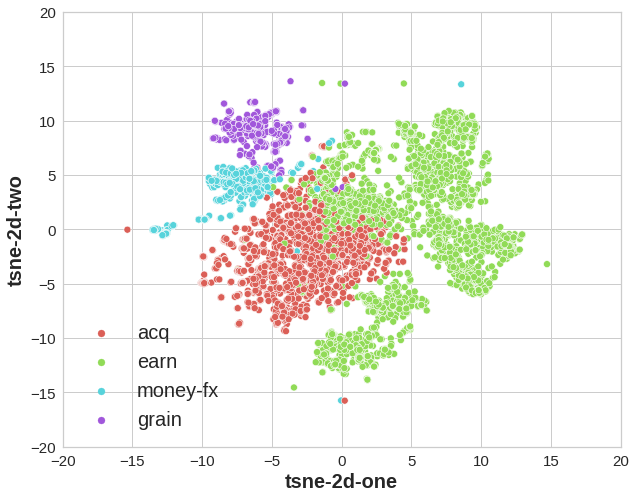

In [35]:
import seaborn as sns
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y
plt.figure(figsize=(10,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.xlabel('tsne-2d-one',fontsize=20, weight = 'bold')
plt.ylabel('tsne-2d-two',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 20)

## Visualize Confusion matrix for Bi-LSTM

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [33]:
LSTM_pred = pd.read_csv('LSTM_pred.csv')
label_test = pd.read_csv('Test_labels.csv')

In [34]:
LSTM_pred = LSTM_pred.iloc[:, 1:].values
label_test = label_test.iloc[:, 1:].values

In [35]:
object_class = mlb.classes_

In [36]:
predict_label = []
for i in range(LSTM_pred.shape[0]):
    tmp = ''
    for k in range(LSTM_pred.shape[1]):
        if LSTM_pred[i, k] == 1:
            if tmp != '':
                tmp += ', '

            tmp += object_class[k]
            

    predict_label.append(tmp)
    
target_label = []
for i in range(label_test.shape[0]):
    tmp = ''
    for k in range(label_test.shape[1]):
        if label_test[i, k] == 1:
            if tmp != '':
                tmp += ', '
                
            tmp += object_class[k]


    target_label.append(tmp)
    
counter=collections.Counter(target_label)

counter = pd.DataFrame.from_dict(counter, orient='index').reset_index()
counter.columns = ['object_combinations', 'frequency']
counter = counter.sort_values(by = ['frequency'], ascending=False).reset_index(drop = True)
counter

,object_combinations,frequency
0,earn,1083
1,acq,696
2,crude,121
3,money-fx,87
4,interest,81
...,...,...
222,"acq, alum",1
223,"cpi, gnp, money-supply",1
224,"grain, meal-feed, oilseed",1
225,"gold, platinum",1


In [37]:
majority_class = counter[counter['frequency'] > 30]['object_combinations'].values
majority_class

array(['earn', 'acq', 'crude', 'money-fx', 'interest', 'trade',
       'interest, money-fx', 'crude, ship', 'ship', 'grain, wheat'],
      dtype=object)

In [38]:
majority_class = counter[counter['frequency'] > 30]['object_combinations'].values

target_label_maj = []
predict_label_maj = []
for i in range(len(target_label)):
    if target_label[i] in majority_class:
        target_label_maj.append(target_label[i])
    else:
        target_label_maj.append('Others')
        
    if predict_label[i] in majority_class:
        predict_label_maj.append(predict_label[i])
    else:
        predict_label_maj.append('Others')

'''
for i in range(len(target_label)):
    if target_label[i] in majority_class:
        target_label_maj.append(target_label[i])
        predict_label_maj.append(predict_label[i])
        
    else:
        target_label_maj.append('Others')
        predict_label_maj.append(predict_label[i])
'''

"\nfor i in range(len(target_label)):\n    if target_label[i] in majority_class:\n        target_label_maj.append(target_label[i])\n        predict_label_maj.append(predict_label[i])\n        \n    else:\n        target_label_maj.append('Others')\n        predict_label_maj.append(predict_label[i])\n"

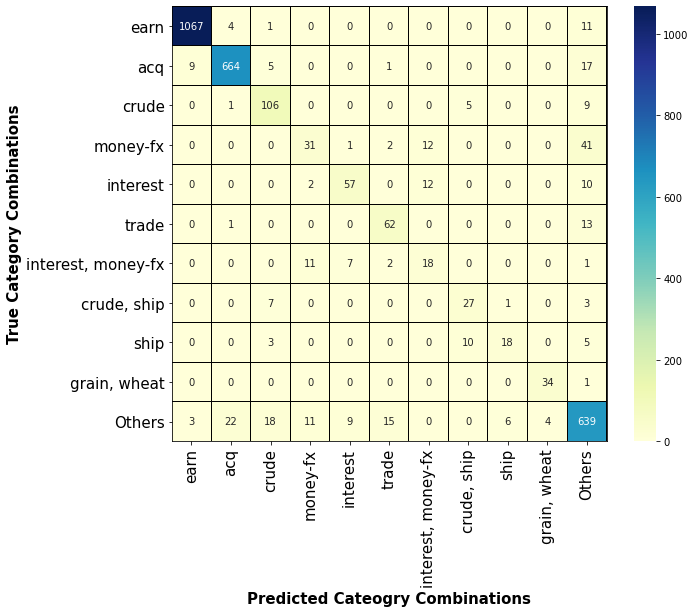

In [39]:
cm = confusion_matrix(target_label_maj, predict_label_maj, labels =  np.append(majority_class, 'Others'))
#cmn = cm / cm.sum(axis=1)[:, np.newaxis] # normalize by each row

fig, axs = plt.subplots(1,1,figsize=(10, 8))
ws = 15
objects =  np.append(majority_class, 'Others')
heat_map = sns.heatmap(cm, annot = True, fmt="d", cmap="YlGnBu", square = True,linewidths=0.01, linecolor='black',rasterized=False)
# make frame visible YlGnBu
for _, spine in heat_map.spines.items():
    spine.set_visible(True)
plt.yticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation = 0)
plt.xticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation=90)
plt.xlabel('Predicted Cateogry Combinations',fontsize=ws, weight = 'bold')
plt.ylabel('True Category Combinations',fontsize=ws, weight = 'bold')
plt.savefig('object_confusion_matrix.png')

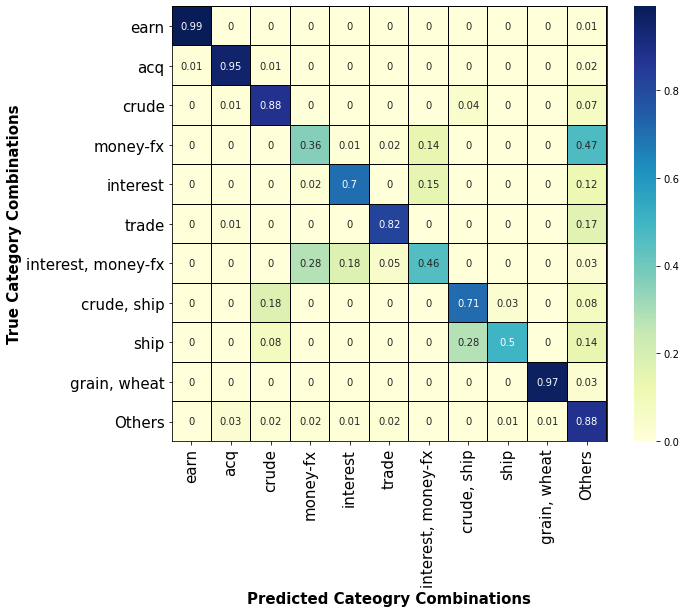

In [40]:
cm = confusion_matrix(target_label_maj, predict_label_maj, labels =  np.append(majority_class, 'Others'))
cmn = cm / cm.sum(axis=1)[:, np.newaxis] # normalize by each row
cmn = np.round(cmn, 2)

fig, axs = plt.subplots(1,1,figsize=(10, 8))
ws = 15
objects =  np.append(majority_class, 'Others')
heat_map = sns.heatmap(cmn, annot = True, cmap="YlGnBu", square = True,linewidths=0.01, linecolor='black',rasterized=False)
# make frame visible YlGnBu
for _, spine in heat_map.spines.items():
    spine.set_visible(True)
plt.yticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation = 0)
plt.xticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation=90)
plt.xlabel('Predicted Cateogry Combinations',fontsize=ws, weight = 'bold')
plt.ylabel('True Category Combinations',fontsize=ws, weight = 'bold')
plt.savefig('object_confusion_matrix.png')

In [68]:
wrong_predictions = []

for i in range(len(target_label)):
    if target_label[i] == 'money-fx' and predict_label[i] not in majority_class:
        if predict_label[i] == '':
            wrong_predictions.append([target_label[i], 'no label'])
        else:
            wrong_predictions.append([target_label[i], predict_label[i]])

In [69]:
wrong_predictions = pd.DataFrame(wrong_predictions)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

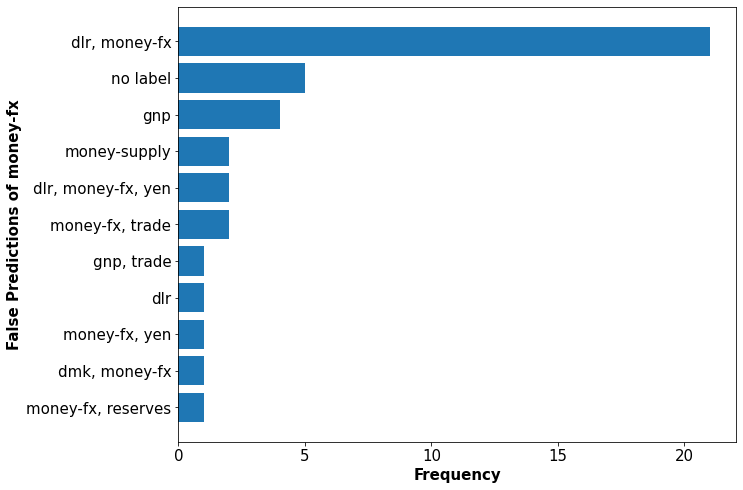

In [84]:
fig, axs = plt.subplots(1,1,figsize=(10, 8))
wrong_predictions.columns = ['target_label', 'predictions']
wrong_predictions[wrong_predictions['predictions'] == '']['predictions'] = 'no category'
count_freq = wrong_predictions['predictions'].value_counts()
count_freq = pd.DataFrame(count_freq).reset_index()
count_freq.columns = ['label', 'frequency']
count_freq = count_freq.sort_values(by = ['frequency'])

plt.barh(count_freq['label'], count_freq['frequency']) 
plt.ylabel('False Predictions of money-fx',fontsize=ws, weight = 'bold')
plt.xlabel('Frequency',fontsize=ws, weight = 'bold')
plt.xticks(np.arange(0, 25, 5), fontsize = 15)
plt.yticks(fontsize = 15)

In [82]:
count_freq

,label,frequency
0,"dlr, money-fx",21
1,no label,5
2,gnp,4
3,"money-fx, trade",2
4,"dlr, money-fx, yen",2
5,money-supply,2
6,"money-fx, reserves",1
7,"dmk, money-fx",1
8,"money-fx, yen",1
9,dlr,1


In [61]:
wrong_predictions

,target_label,predictions
0,money-fx,gnp
1,money-fx,
2,money-fx,
3,money-fx,"dlr, money-fx"
4,money-fx,"money-fx, yen"
5,money-fx,"dlr, money-fx"
6,money-fx,"dlr, money-fx, yen"
7,money-fx,"money-fx, trade"
8,money-fx,
9,money-fx,
